In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix

In [67]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [3]:
df = pd.read_csv('train.csv')

In [4]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [5]:
df.describe()

,VENDIDO
count,78331.00000
mean,0.60732
std,0.48835
min,0.00000
25%,0.00000
50%,1.00000
75%,1.00000
max,1.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78331 entries, 0 to 78330
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   marca             77973 non-null  object
 1   nomeDaPeca        78331 non-null  object
 2   precoComDesconto  78331 non-null  object
 3   precoSemDesconto  76821 non-null  object
 4   Descricao         78323 non-null  object
 5   Tamanho           78055 non-null  object
 6   Condicao          78331 non-null  object
 7   Cores             76728 non-null  object
 8   VENDIDO           78331 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 5.4+ MB


In [7]:
df['precoComDesconto'] = pd.to_numeric(df['precoComDesconto'].str.replace('[^0-9.]', '', regex=True), errors='coerce')
df['precoSemDesconto'] = pd.to_numeric(df['precoSemDesconto'].str.replace('[^0-9.]', '', regex=True), errors='coerce')


In [8]:
df['precoComDesconto'] = pd.to_numeric(df['precoComDesconto'])
df['precoSemDesconto'] = pd.to_numeric(df['precoSemDesconto'])


In [9]:
df['Tamanho'].unique()

array(['m', '38', ' 39', 'p', ' 38', ' 36', ' U', 'u', '34', ' M', '36',
       ' 42', 'g', 'pp', '42', ' 35', '40', ' P', '6', nan, '14', ' 34',
       ' 40', ' G', 'gg', '44', '3m', '50', '3', '4', ' PP', '8', '33',
       ' 6M', ' 3M', ' 10M', ' 12M', '12', '37', '35', '48', '16', ' RN',
       '2a', ' GG', ' 37', ' 44', '1', 'rn', '6m', '32', '21', '12m',
       'xgg', '18m', ' 8A', '7', ' 12A', '9m', '46', ' 2A', '5', '2',
       '39', '54', ' 20', ' 1A', ' 10A', ' 18', '10', '29', ' 4A', '30',
       ' 50', ' 6A', ' 48', ' 46', ' 16', '52', '11', ' 17', ' 33', '13',
       '22', ' 14A', '41', '20', '9', ' 21', ' 19', '31', '25', ' 41',
       '58', '17', ' 13', ' 26', '19', '28', '23', '26', ' 14', ' 4',
       '24', '43', ' 3A', ' 32', '56', ' 1', ' XLG', ' 23', ' 15', 'M',
       '27', '18', ' G3', ' 24', '15', ' 54', ' 3', ' 56', ' G4', '45',
       ' 5G', ' 28', '60', ' 27', 'P'], dtype=object)

In [10]:
df

,marca,nomeDaPeca,precoComDesconto,precoSemDesconto,Descricao,Tamanho,Condicao,Cores,VENDIDO
0,sem marca,\nBlusa Verde Babados\n,64.00,160.0,Blusa verde com modelagem básica. Peça com bab...,m,gentilmente usada,verde,0
1,zara,\nSaia Lápis Zara\n,57.00,219.0,Marca: Zara Woman,38,gentilmente usada,"Detalhe: Dois bolsos frontais, forro, zíper tr...",1
2,1 a 9,\nJeans Skinny 1 a 9\n,69.00,279.0,"Medidas: cintura 32cm, quadril 43cm, comprime...",38,gentilmente usada,azul,0
3,Coach,Sapatilha Monograma,25000.00,87500.0,Sapatilha caramelo. Possui monograma em toda a...,39,Usado,\nCaramelo \nPreto \n,1
4,primeiro item teen,\nShorts Feminino Teen Corações\n,20.97,69.9,"Shorts feminino, com estampa de corações, do P...",m,gentilmente usada,colorido,0
...,...,...,...,...,...,...,...,...,...
78326,mandi,\nCamisa Preta Mandi\n,15.00,69.9,"Camisa feminina, preta, da Mandi. Tecido plano...",m,gentilmente usada,preto,0
78327,mo,\nSaia Branca Bordada\n,33.75,135.0,"Saia branca com bordados em linha prata, azul ...",p,gentilmente usada,branco,1
78328,luigi bertolli,\nVestido Floral Preto e Vermelho Luigi Bertol...,27.48,89.9,"Vestido preto com flores vermelhas, da Luigi B...",gg,gentilmente usada,colorido,1
78329,Zara,Blazer Tweed Bege,7000.00,28000.0,"Blazer em tweed, nas cores bege e dourado. Pos...",P,Usado,\nBege \n,1


In [12]:
df2 = pd.read_csv('test.csv')

In [13]:
df2['precoComDesconto'] = pd.to_numeric(df2['precoComDesconto'].str.replace('[^0-9.]', '', regex=True), errors='coerce')
df2['precoSemDesconto'] = pd.to_numeric(df2['precoSemDesconto'].str.replace('[^0-9.]', '', regex=True), errors='coerce')


In [14]:
df2['precoComDesconto'] = pd.to_numeric(df['precoComDesconto'])
df2['precoSemDesconto'] = pd.to_numeric(df['precoSemDesconto'])


In [15]:
df.isnull().sum()

marca                358
nomeDaPeca             0
precoComDesconto       0
precoSemDesconto    1510
Descricao              8
Tamanho              276
Condicao               0
Cores               1603
VENDIDO                0
dtype: int64

C:\Users\filipe.sampaio\AppData\Local\Temp\ipykernel_13248\381426080.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="VENDIDO", data=df, palette=sns.xkcd_palette(["azure", "light red"]))


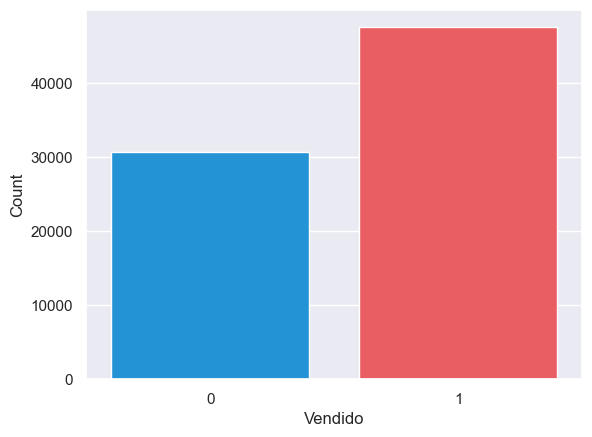

In [16]:
sns.set(style="darkgrid")
ax = sns.countplot(x="VENDIDO", data=df, palette=sns.xkcd_palette(["azure", "light red"]))
plt.xlabel('Vendido')
plt.ylabel('Count')
plt.show()

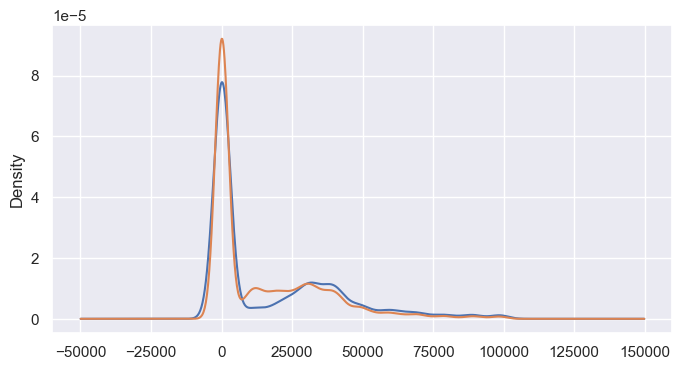

In [17]:
fig=plt.figure(figsize=(8,4))
for x in [0,1]:
    df['precoSemDesconto'][df['VENDIDO']==x].plot(kind='kde')
    


plt.show()

<Axes: >

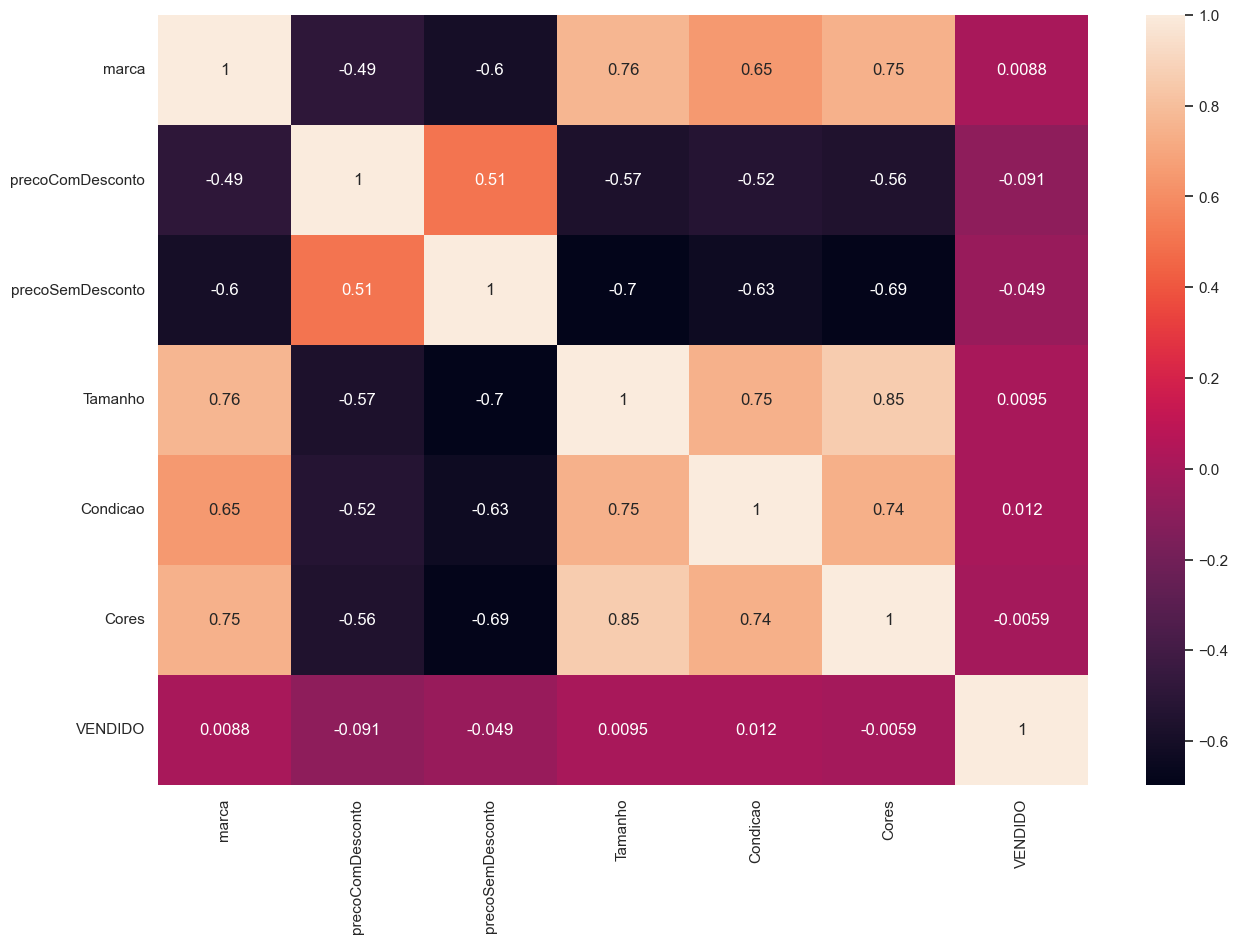

In [28]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot = True, ax=ax)

In [20]:
df['Condicao'].unique()

array(['gentilmente usada', 'Usado', 'Novo com etiqueta',
       'nova com etiqueta', 'Novo sem etiqueta', 'novo com etiqueta'],
      dtype=object)

In [21]:
# Codificação de Variáveis Categóricas
label_encoders = {}
categorical_columns = ['marca', 'Tamanho', 'Condicao', 'Cores']
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
    
    

In [26]:
df = df.drop(['nomeDaPeca', 'Descricao'], axis= 1)

In [27]:
df

,marca,precoComDesconto,precoSemDesconto,Tamanho,Condicao,Cores,VENDIDO
0,9669,64.00,160.0,121,3,1939,0
1,11340,57.00,219.0,92,3,1454,1
2,229,69.00,279.0,92,3,1921,0
3,576,25000.00,87500.0,30,2,727,1
4,8922,20.97,69.9,121,3,1926,0
...,...,...,...,...,...,...,...
78326,7282,15.00,69.9,121,3,1935,0
78327,7833,33.75,135.0,122,3,1924,1
78328,7041,27.48,89.9,120,3,1926,1
78329,1611,7000.00,28000.0,53,2,478,1


In [43]:
X = df.drop(['VENDIDO'], axis=1)
y = df['VENDIDO']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
print(df.isnull().sum())

marca               0
precoComDesconto    0
precoSemDesconto    0
Tamanho             0
Condicao            0
Cores               0
VENDIDO             0
dtype: int64


In [41]:
df.fillna(df.mean(), inplace=True)

In [47]:
from sklearn.model_selection import cross_val_score

# Defina os modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naïve Bayes': GaussianNB(),
    'Support Vector Machines': SVC(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Tree Classifier': RandomForestClassifier(),
    'Artificial Neural Networks': MLPClassifier(),
}

# Loop através dos modelos
for model_name, model in models.items():
    # Treine e avalie o modelo usando validação cruzada (k-fold)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Calcule a média das pontuações
    mean_score = scores.mean()
    
    # Ajuste o modelo aos dados de treinamento
    model.fit(X_train, y_train)
    
    # Faça previsões nos dados de teste
    y_pred = model.predict(X_test)
    
    # Avalie o modelo
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Cross-Validation Mean Accuracy: {mean_score:}")
    print(f"Accuracy on Test Data: {accuracy:}")
    print("Classification Report:\n", report)
    print("="*50)


Model: Logistic Regression
Cross-Validation Mean Accuracy: 0.612883207179611
Accuracy on Test Data: 0.6120425531914894
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.07      0.13      9253
           1       0.62      0.96      0.75     14247

    accuracy                           0.61     23500
   macro avg       0.59      0.52      0.44     23500
weighted avg       0.59      0.61      0.51     23500

Model: K-Nearest Neighbors
Cross-Validation Mean Accuracy: 0.5954660642681114
Accuracy on Test Data: 0.595063829787234
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.41      0.44      9253
           1       0.65      0.72      0.68     14247

    accuracy                           0.60     23500
   macro avg       0.57      0.56      0.56     23500
weighted avg       0.58      0.60      0.59     23500

Model: Gaussian Naïve Bayes
Cross-Validation Mean Accuracy: 

KeyboardInterrupt: 

In [49]:
#askjdfhsaçkjda

In [50]:
df.corr()

,marca,precoComDesconto,precoSemDesconto,Tamanho,Condicao,Cores,VENDIDO
marca,1.000000,-0.489787,-0.598729,0.762376,0.645844,0.745034,0.008838
precoComDesconto,-0.489787,1.000000,0.501940,-0.570380,-0.524472,-0.555758,-0.090740
precoSemDesconto,-0.598729,0.501940,1.000000,-0.688901,-0.627197,-0.679190,-0.048811
Tamanho,0.762376,-0.570380,-0.688901,1.000000,0.746884,0.854677,0.009489
Condicao,0.645844,-0.524472,-0.627197,0.746884,1.000000,0.741444,0.012383
Cores,0.745034,-0.555758,-0.679190,0.854677,0.741444,1.000000,-0.005918
VENDIDO,0.008838,-0.090740,-0.048811,0.009489,0.012383,-0.005918,1.000000


In [1]:
#comentario das proximas atualizacoes